In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import yfinance as yf

In [2]:
enb = yf.Ticker("ENB.TO")
enb_df = enb.history(period='max')
enb_df = enb_df.drop(columns=["Dividends", "Stock Splits"])
enb_df = enb_df.loc['2010':'2020']
enb_df = enb_df.dropna()
enb_df["Enb change"] = enb_df['Close'].diff()
enb_df["Vol change"] = enb_df['Volume'].diff()
enb_df["Target Close"] = enb_df['Close'].shift(periods=-1)
enb_df.rename(columns = {"Close": "Enb Close"},  inplace = True)
enb_df.head()

,Open,High,Low,Enb Close,Volume,Enb change,Vol change,Target Close
Date,,,,,,,,
2010-01-04,14.928394,14.974470,14.630442,14.759452,1272000.0,NaN,NaN,14.897686
2010-01-05,14.802463,14.925331,14.707242,14.897686,1219800.0,0.138234,-52200.0,14.559792
2010-01-06,14.928393,15.051261,14.467640,14.559792,2693000.0,-0.337894,1473200.0,14.513723
2010-01-07,14.572085,14.608946,14.295634,14.513723,2365600.0,-0.046068,-327400.0,14.538293
2010-01-08,14.526006,14.590511,14.464572,14.538293,1656800.0,0.024570,-708800.0,14.436925


In [3]:
oil = yf.Ticker("CL=F")
oil_df = oil.history(period='max')
oil_df = pd.DataFrame(oil_df["Close"])
oil_df = oil_df.loc['2010':'2020']
oil_df = oil_df.dropna()
oil_df["Oil return"] = oil_df['Close'].diff()
oil_df.rename(columns = {"Close": "Oil Close"},  inplace = True)
oil_df.head()

,Oil Close,Oil return
Date,,
2010-01-04,81.510002,NaN
2010-01-05,81.769997,0.259995
2010-01-06,83.180000,1.410004
2010-01-07,82.660004,-0.519997
2010-01-08,82.750000,0.089996


In [4]:
gas = yf.Ticker("NG=F")
gas_df = gas.history(period='max')
gas_df = pd.DataFrame(gas_df["Close"])
gas_df = gas_df.loc['2010':'2020']
gas_df = gas_df.dropna()
gas_df["Gas return"] = gas_df['Close'].diff()
gas_df.rename(columns = {"Close": "Gas Close"},  inplace = True)
gas_df.head()

,Gas Close,Gas return
Date,,
2010-01-04,5.884,NaN
2010-01-05,5.637,-0.247
2010-01-06,6.009,0.372
2010-01-07,5.806,-0.203
2010-01-08,5.749,-0.057


In [5]:
sun = yf.Ticker("SU.TO")
sun_df = sun.history(period='max')
sun_df = pd.DataFrame(sun_df["Close"])
sun_df = sun_df.loc['2010':'2020']
sun_df = sun_df.dropna()
sun_df["SU return"] = sun_df['Close'].diff()
sun_df.rename(columns = {"Close": "SU Close"},  inplace = True)
sun_df.head()

,SU Close,SU return
Date,,
2010-01-04,28.525635,NaN
2010-01-05,28.845892,0.320257
2010-01-06,29.233198,0.387306
2010-01-07,28.912926,-0.320272
2010-01-08,28.816093,-0.096832


In [6]:
tsx = yf.Ticker("^GSPTSE")
tsx_df = tsx.history(period='max')
tsx_df = pd.DataFrame(tsx_df["Close"])
tsx_df = tsx_df.loc['2010':'2020']
tsx_df = tsx_df.dropna()
tsx_df["TSX return"] = tsx_df['Close'].diff()
tsx_df.rename(columns = {"Close": "TSX Close"},  inplace = True)
tsx_df.head()

,TSX Close,TSX return
Date,,
2010-01-04,11866.900391,NaN
2010-01-05,11888.099609,21.199219
2010-01-06,11944.500000,56.400391
2010-01-07,11887.500000,-57.000000
2010-01-08,11953.799805,66.299805


In [7]:
engmodel_df = pd.concat([enb_df, oil_df, gas_df, sun_df, tsx_df], axis=1, join="inner")
engmodel_df = engmodel_df.dropna()

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

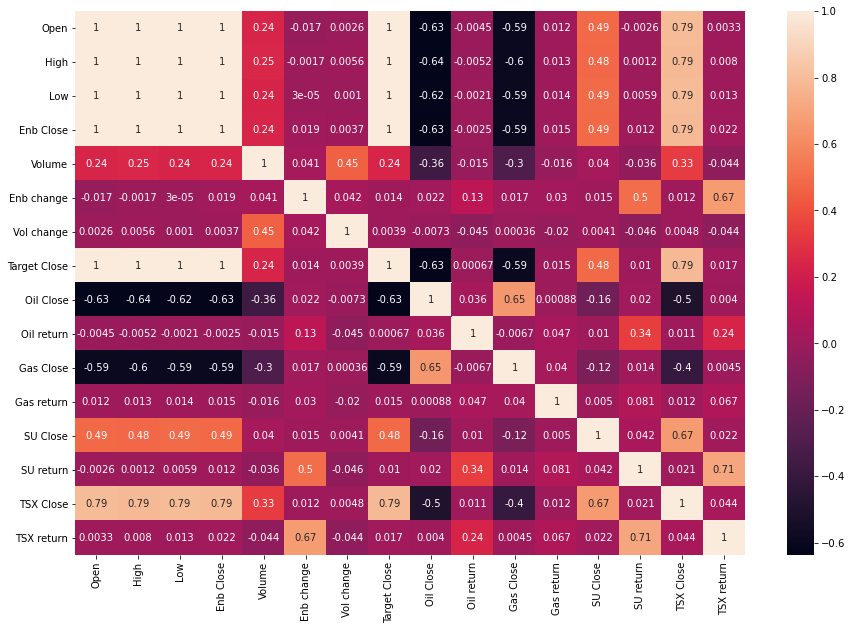

In [9]:
corrmat = engmodel_df.corr()
fig, heat = plt.subplots(figsize = (15, 10))
heat = sn.heatmap(corrmat, annot=True)
plt.show()

In [19]:
eng_df = engmodel_df.drop(["Enb change", "Vol change", "Oil return", "Gas return", "SU return", "TSX return"], axis=1)
eng_df

,Open,High,Low,Enb Close,Volume,Target Close,Oil Close,Gas Close,SU Close,TSX Close
Date,,,,,,,,,,
2010-01-05,14.802463,14.925331,14.707242,14.897686,1219800.0,14.559792,81.769997,5.637,28.845892,11888.099609
2010-01-06,14.928393,15.051261,14.467640,14.559792,2693000.0,14.513723,83.180000,6.009,29.233198,11944.500000
2010-01-07,14.572085,14.608946,14.295634,14.513723,2365600.0,14.538293,82.660004,5.806,28.912926,11887.500000
2010-01-08,14.526006,14.590511,14.464572,14.538293,1656800.0,14.436925,82.750000,5.749,28.816093,11953.799805
2010-01-11,14.599724,14.599724,14.375491,14.436925,1818400.0,14.427713,82.519997,5.454,28.734173,11947.099609
...,...,...,...,...,...,...,...,...,...,...
2020-12-21,41.310001,41.570000,40.639999,41.549999,5405400.0,41.230000,47.740002,2.705,21.670000,17500.900391
2020-12-22,41.820000,41.849998,41.119999,41.230000,3185400.0,41.279999,47.020000,2.780,21.219999,17552.500000
2020-12-23,41.240002,41.630001,41.189999,41.279999,3626900.0,41.250000,48.119999,2.608,22.080000,17593.599609


In [20]:
eng_df.dtypes

Open            float64
High            float64
Low             float64
Enb Close       float64
Volume          float64
Target Close    float64
Oil Close       float64
Gas Close       float64
SU Close        float64
TSX Close       float64
dtype: object

In [21]:
eng_df = eng_df[["Open", "High",'Low',"Volume","Gas Close","Oil Close", "SU Close", "TSX Close", "Enb Close", "Target Close"]]
eng_df

,Open,High,Low,Volume,Gas Close,Oil Close,SU Close,TSX Close,Enb Close,Target Close
Date,,,,,,,,,,
2010-01-05,14.802463,14.925331,14.707242,1219800.0,5.637,81.769997,28.845892,11888.099609,14.897686,14.559792
2010-01-06,14.928393,15.051261,14.467640,2693000.0,6.009,83.180000,29.233198,11944.500000,14.559792,14.513723
2010-01-07,14.572085,14.608946,14.295634,2365600.0,5.806,82.660004,28.912926,11887.500000,14.513723,14.538293
2010-01-08,14.526006,14.590511,14.464572,1656800.0,5.749,82.750000,28.816093,11953.799805,14.538293,14.436925
2010-01-11,14.599724,14.599724,14.375491,1818400.0,5.454,82.519997,28.734173,11947.099609,14.436925,14.427713
...,...,...,...,...,...,...,...,...,...,...
2020-12-21,41.310001,41.570000,40.639999,5405400.0,2.705,47.740002,21.670000,17500.900391,41.549999,41.230000
2020-12-22,41.820000,41.849998,41.119999,3185400.0,2.780,47.020000,21.219999,17552.500000,41.230000,41.279999
2020-12-23,41.240002,41.630001,41.189999,3626900.0,2.608,48.119999,22.080000,17593.599609,41.279999,41.250000


In [22]:
eng_csv_data = eng_df.to_csv('eng.csv', index = True) 